In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')   # google drive를 google colab에 연결

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Colab Notebooks/Hackathon

/content/gdrive/My Drive/Colab Notebooks/Hackathon


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def jpg_image_to_array(image_path, size):
  image = Image.open(image_path)      # open image
  image = image.resize((size, size))  #resize
  im_arr = np.fromstring(image.tobytes(), dtype=np.uint8) #convert to int ndarray
  print(im_arr.shape)
  return im_arr

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input #resnet 사용할것.
from tensorflow.keras.preprocessing import image
import os

In [ ]:
def read_all_file(path):
    output = os.listdir(path)
    file_list = []

    for i in output:
        if os.path.isdir(path+"/"+i): 
            file_list.extend(read_all_file(path+"/"+i)) 
        elif os.path.isfile(path+"/"+i):
            file_list.append(path+"/"+i)

    return file_list

In [ ]:
%ls

clean/  dirty/


In [ ]:
dirty = read_all_file("dirty")
dirty[:5]

['dirty/다운로드.jpg',
 'dirty/images3.jpg',
 'dirty/images4.jpg',
 'dirty/images7.jpg',
 'dirty/images11.jpg']

In [ ]:
clean = read_all_file("clean")
clean[:5]

['clean/다운로드.jpg',
 'clean/다운로드 (1).jpg',
 'clean/다운로드 (2).jpg',
 'clean/배달-플라스틱-용기-pc0xy5au4wfk1aatkoxwi4elovlwaygo4v6ifdyrcw.jpg',
 'clean/다운로드 (3).jpg']

In [ ]:
x_dirty = []
for d in dirty:
  img = image.load_img(d,target_size= (224, 224))
  x = image.img_to_array(img)
  x = preprocess_input(x)
  x_dirty.append(x)

In [ ]:
x_clean = []
for c in clean:
  img = image.load_img(c,target_size= (224, 224))
  x = image.img_to_array(img)
  x = preprocess_input(x)
  x_clean.append(x)

In [ ]:
y_dirty = np.ones(len(x_dirty))
y_clean = np.ones(len(x_clean))

In [ ]:
x = x_dirty + x_clean
y = list(y_dirty) + list(y_clean)

In [ ]:
x = np.asarray(x)
y = np.asarray(y)

Epoch 1/200
1/1 - 2s - loss: 11.9631 - accuracy: 0.4111 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 2/200
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 360ms/epoch - 360ms/step
Epoch 3/200
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 429ms/epoch - 429ms/step
Epoch 4/200
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 383ms/epoch - 383ms/step
Epoch 5/200
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 390ms/epoch - 390ms/step
Epoch 6/200
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 354ms/epoch - 354ms/step
Epoch 7/200
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 355ms/epoch - 355ms/step
Epoch 8/200
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - v

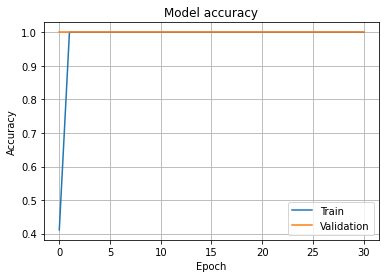

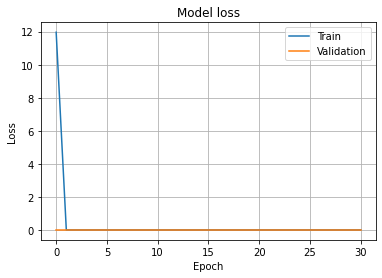

In [ ]:
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3))) 
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(1,activation='sigmoid'))

# 신경망 모델 학습
cnn.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 30, mode='min') 
hist=cnn.fit(x,y,batch_size=100,epochs=200,validation_split=0.1,callbacks = [early_stop],verbose=2) 

# 신경망 모델 정확률 평가
res=cnn.evaluate(x,y,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
cnn.save("my_cnn.h5")